# La scoperta del Bosone di Higgs!

Questo notebook serve per dare un'occhiata a come molte aree della scienza funzionino, esplorando come è stato scoperto il [bosone di Higgs](https://en.wikipedia.org/wiki/Higgs_boson).

I dati che usiamo qui sono reali e significativi, raccolti per l’appunto nell’esperimento CMS! Nel 2013 hanno confermato l'esistenza di questa particella sfuggente, che ha poi portato ad un premio Nobel. Invece di nasconderti da qualche parte sotto grafici già pronti, questo è il tuo momento per esplorare! Questo esempio si basa sul codice originale in  [http://opendata.cern.ch/record/5500], il CERN Open Data portal (Jomhari, Nur Zulaiha; Geiser, Achim; Bin Anuar, Afiq Aizuddin; (2017). Si tratta di un esempio di analisi della produzione dell’Higgs da quattro leptoni che utilizza i dati prodotti negli anni 2011-2012. CERN Open Data portal. DOI: 10.7483/OPENDATA.CMS.JKB8.RR42), notebook di Tom McCauley (University of Notre Dame) e Peitsa Veteli (Helsinki Institute of Physics).

Il metodo utilizzato è piuttosto comune e utile per diversi scopi. Negli esperimenti si parte con delle basi teoriche, si fanno misurazioni e infine si prova a vedere se quelle misurazioni contengono delle informazioni in accordo o contrarie alle ipotesi teoriche. A volte i risultati confermano le nostre aspettative, sollevano nuove domande su cui ponderare, ci costringono ad adattare le nostre teorie o ne richiedono di completamente nuove. 

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Dati che utilizzeremo più tardi.

csvs = [pd.read_csv('../Data/4mu_2011.csv'), pd.read_csv('../Data/4e_2011.csv'), pd.read_csv('../Data/2e2mu_2011.csv')]
csvs += [pd.read_csv('../Data/4mu_2012.csv'), pd.read_csv('../Data/4e_2012.csv'), pd.read_csv('../Data/2e2mu_2012.csv')]

fourlep = pd.concat(csvs)

Secondo il modello standard, uno dei modi in cui il bosone di Higgs può decadere è creando prima due bosoni Z che poi decadono ulteriormente in quattro leptoni (elettroni, muoni...). Non è l'unico processo con un questo stato finale, ovviamente, quindi è necessario setacciare un bel po' di rumore per riuscire a vedere questa particolare reazione. La teoria non dice molto su quale potrebbe essere la massa di Higgs, ma alcune idee furbe possono portarti piuttosto lontano. Ad esempio, il decadimento di quattro leptoni è molto dominante per alcuni intervalli di “Energia”, guidando quindi la nostra ricerca.

In [3]:
# Inseriamo alcuni valori che caratterizzano l'intervallo "energetico" di interesse.

rmin = 70
rmax = 181
nbins = 37

M_hist = np.histogram(fourlep['M'], bins = nbins, range = (rmin,rmax))

hist, bins = M_hist
width = 1.0*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

Diamo un'occhiata ad alcune simulazioni di altri processi che hanno luogo a queste energie. Ecco alcuni valori delle simulazioni [Monte Carlo](https://en.wikipedia.org/wiki/Monte_Carlo_method). Fondamentalmente creiamo un insieme di valori che hanno una certa casualità, proprio come avverrebbe in un esperimento reale, ma che segue la distribuzione che è stata osservata in quei processi.

In [4]:
dy = np.array([0,0,0,0,0,0.354797,0.177398,2.60481,0,0,0,0,0,0,0,0,0,0.177398,0.177398,0,0.177398,0,0,0,0,0,0,0,0,0,0,0,0.177398,0,0,0,0])
ttbar = np.array([0.00465086,0,0.00465086,0,0,0,0,0,0,0,0.00465086,0,0,0,0,0,0.00465086,0,0,0,0,0.00465086,0.00465086,0,0,0.0139526,0,0,0.00465086,0,0,0,0.00465086,0.00465086,0.0139526,0,0])
zz = np.array([0.181215,0.257161,0.44846,0.830071,1.80272,4.57354,13.9677,14.0178,4.10974,1.58934,0.989974,0.839775,0.887188,0.967021,1.07882,1.27942,1.36681,1.4333,1.45141,1.41572,1.51464,1.45026,1.47328,1.42899,1.38757,1.33561,1.3075,1.29831,1.31402,1.30672,1.36442,1.39256,1.43472,1.58321,1.85313,2.19304,2.95083])
hzz = np.array([0.00340992,0.00450225,0.00808944,0.0080008,0.00801578,0.0108945,0.00794274,0.00950757,0.0130648,0.0163568,0.0233832,0.0334813,0.0427229,0.0738129,0.13282,0.256384,0.648352,2.38742,4.87193,0.944299,0.155005,0.0374193,0.0138906,0.00630364,0.00419265,0.00358719,0.00122527,0.000885718,0.000590479,0.000885718,0.000797085,8.86337e-05,0.000501845,8.86337e-05,0.000546162,4.43168e-05,8.86337e-05])


Diamo un'occhiata a questi numeri e come contribuiscono a ciò che misureremo nell'acceleratore.

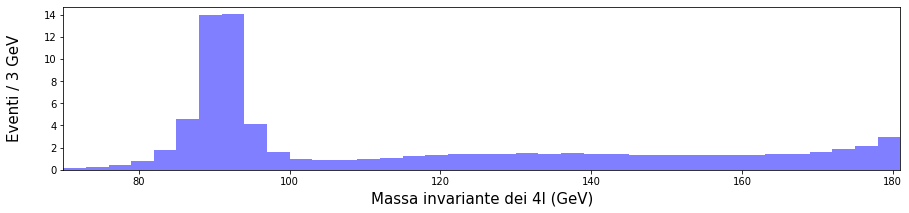

In [5]:
# ZZ, una coppia di bosoni più pesanti.

plt.figure(figsize = (15,3))
plt.bar(center, zz, align = 'center', width = width, color = 'b', linewidth = 0, edgecolor = 'black', alpha = 0.5)

plt.xlabel('Massa invariante dei 4l (GeV)', fontsize = 15)
plt.ylabel('Eventi / 3 GeV\n', fontsize = 15)
plt.xlim(rmin,rmax)
plt.show()

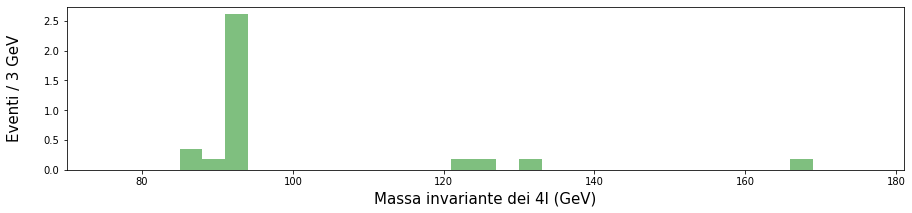

In [6]:
# DY, un po' di rumore che non si può ridurre (bosoni Z singoli).

plt.figure(figsize = (15,3))
plt.bar(center, dy, align = 'center', width = width, color = 'g', linewidth = 0, edgecolor = 'black', alpha = 0.5)

plt.xlabel('Massa invariante dei 4l (GeV)', fontsize = 15)
plt.ylabel('Eventi / 3 GeV\n', fontsize = 15)
plt.xlim(rmin,rmax)
plt.show()

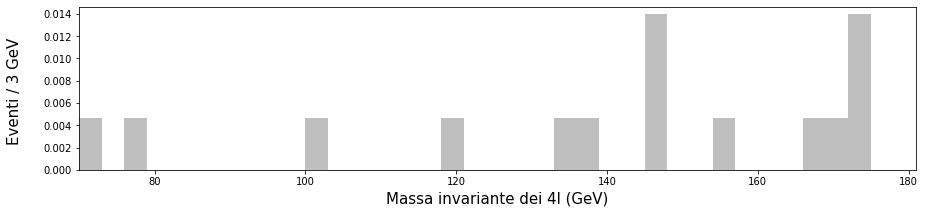

In [7]:
# ttbar, una coppia di quark (top e anti-top).

plt.figure(figsize = (15,3))
plt.bar(center, ttbar, align = 'center', width = width, color = 'gray', linewidth = 0, edgecolor = 'b', alpha = 0.5)

plt.xlabel('Massa invariante dei 4l (GeV)', fontsize = 15)
plt.ylabel('Eventi / 3 GeV \n', fontsize = 15)
plt.xlim(rmin,rmax)
plt.show()

Sovrapponiamo i vari grafici e vediamo che tipo di distribuzioni ci aspettiamo dall'esperimento.

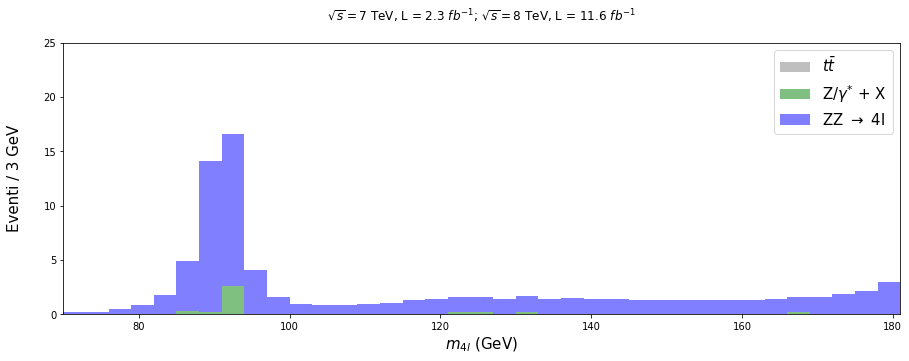

In [8]:
plt.figure(figsize = (15,5))

# ttbar 
ttbar_bar = plt.bar(center, ttbar, align = 'center', width = width, color = 'gray', linewidth = 0, edgecolor = 'b',
                    alpha = 0.5, label = r'$t\bar{t}$')

# DY
dy_bar = plt.bar(center, dy, align = 'center', width = width, color = 'g', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar, label = 'Z/$\gamma^{*}$ + X')

# ZZ
zz_bar = plt.bar(center, zz, align = 'center', width = width, color = 'b', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar+dy, label = r'ZZ $\rightarrow$ 4l')

plt.title('$ \sqrt{s} = 7$ TeV, L = 2.3 $fb^{-1}$; $\sqrt{s} = 8$ TeV, L = 11.6 $fb^{-1}$ \n', fontsize = 12)
plt.xlabel('$m_{4l}$ (GeV)', fontsize = 15)
plt.ylabel('Eventi / 3 GeV\n', fontsize = 15)
plt.ylim(0,25)
plt.xlim(rmin,rmax)
plt.legend(fontsize = 15)

plt.show()


Quindi dovrebbe esserci qualcosa intorno ai 90 GeV o giù di lì, pari alla massa dei bosoni Z. 

Sovrapponiamo i nostri dati sperimentali a quelli simulati. 
Quanto bene si allineano?

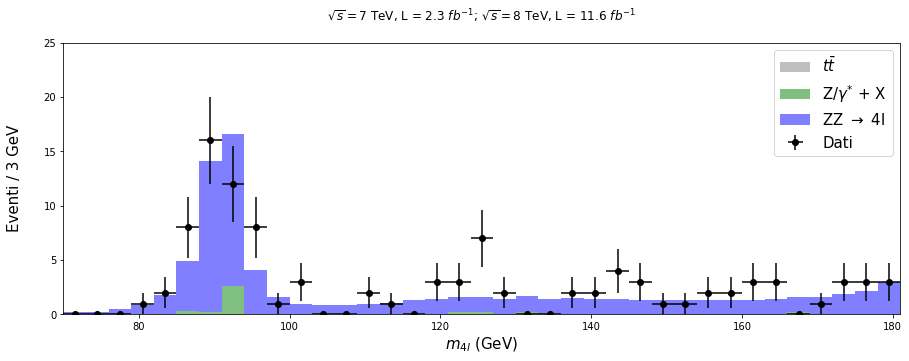

In [9]:
plt.figure(figsize = (15,5))

xerrs = [width*0.5 for i in range(0, nbins)]
yerrs = np.sqrt(hist)

# ttbar 
ttbar_bar = plt.bar(center, ttbar, align = 'center', width = width, color = 'gray', linewidth = 0, edgecolor = 'b',
                    alpha = 0.5, label = r'$t\bar{t}$')

# DY
dy_bar = plt.bar(center, dy, align = 'center', width = width, color = 'g', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar, label = 'Z/$\gamma^{*}$ + X')

# ZZ
zz_bar = plt.bar(center, zz, align = 'center', width = width, color = 'b', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar+dy, label = r'ZZ $\rightarrow$ 4l')

# Dati sperimentali
data_bar = plt.errorbar(center, hist, xerr = xerrs, yerr = yerrs, linestyle = 'None', color = 'black',
                        marker = 'o', label = 'Dati')

plt.title('$ \sqrt{s} = 7$ TeV, L = 2.3 $fb^{-1}$; $\sqrt{s} = 8$ TeV, L = 11.6 $fb^{-1}$ \n', fontsize = 12)
plt.xlabel('$m_{4l}$ (GeV)', fontsize = 15)
plt.ylabel('Eventi / 3 GeV\n', fontsize = 15)
plt.ylim(0,25)
plt.xlim(rmin,rmax)
plt.legend(fontsize = 15)

plt.show()


Ci sono chiaramente alcuni punti che non sembrano previsti dai nostri processi simulati. I fisici hanno effettuato simulazioni per Higgs di differenti masse, una delle quali è riportata in seguito. Questo grafico ci mostra come dovrebbe apparire il bosone di Higgs, se avesse una massa di 125 GeV.

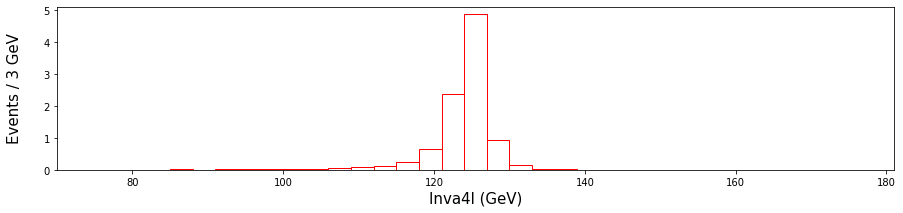

In [10]:
# HZZ, le nostre predizioni teoriche per la produzione di un Higgs da due bosoni Z.

plt.figure(figsize = (15,3))
plt.bar(center, hzz, align = 'center', width = width, color = 'w', linewidth = 1, edgecolor = 'r')

plt.xlabel('Inva4l (GeV)', fontsize = 15)
plt.ylabel('Events / 3 GeV\n', fontsize = 15)
plt.xlim(rmin,rmax)
plt.show()


Domanda bonus: come può qualcosa, che sembra avere una massa di circa 125 GeV, decadere tramite due bosoni Z, con una massa superiore a 90 GeV?

Aggiungilo nel grafico precedente e guarda come si allinea.


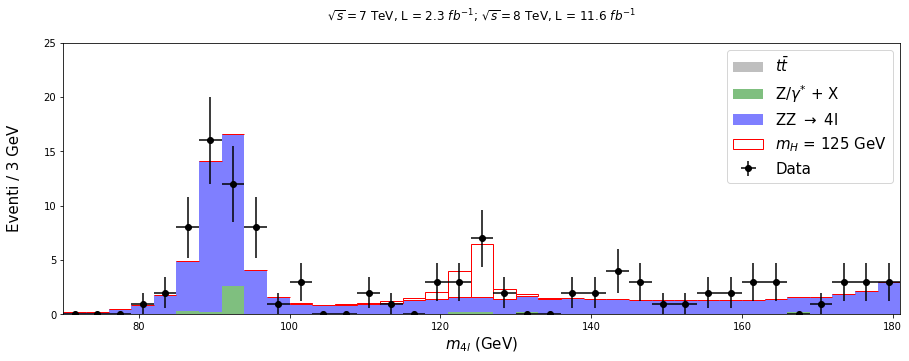

In [11]:
plt.figure(figsize = (15,5))

# ttbar 
ttbar_bar = plt.bar(center, ttbar, align = 'center', width = width, color = 'gray', linewidth = 0, edgecolor = 'b',
                    alpha = 0.5, label = r'$t\bar{t}$')

# DY
dy_bar = plt.bar(center, dy, align = 'center', width = width, color = 'g', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar, label = 'Z/$\gamma^{*}$ + X')

# ZZ
zz_bar = plt.bar(center, zz, align = 'center', width = width, color = 'b', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar+dy, label = r'ZZ $\rightarrow$ 4l')

# HZZ
hzz_bar = plt.bar(center, hzz, align = 'center', width = width, color = 'w', linewidth = 1, edgecolor = 'r',
                  bottom = ttbar+dy+zz, label = '$m_{H}$ = 125 GeV')

# Dati misurati
data_bar = plt.errorbar(center, hist, xerr = xerrs, yerr = yerrs, linestyle = 'None', color = 'black',
                        marker = 'o', label = 'Data')

plt.title('$ \sqrt{s} = 7$ TeV, L = 2.3 $fb^{-1}$; $\sqrt{s} = 8$ TeV, L = 11.6 $fb^{-1}$ \n', fontsize = 12)
plt.xlabel('$m_{4l}$ (GeV)', fontsize = 15)
plt.ylabel('Eventi / 3 GeV\n', fontsize = 15)
plt.ylim(0,25)
plt.xlim(rmin,rmax)
plt.legend(fontsize = 15)

plt.show()


Questo campione di dati è piuttosto ridotto, ma ci offre comunque uno sguardo illuminante su come viene svolta la ricerca. 

Informazioni più precise sui dati possono essere trovate [qui](http://opendata.cern.ch/record/5500).

In [12]:
# Possiamo anche vedere le proprietà di tutti e quattro i leptoni coinvolti!

pd.options.display.max_columns = 50
fourlep.head()

,Run,Event,PID1,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,PID2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,PID3,E3,px3,py3,pz3,pt3,eta3,phi3,Q3,PID4,E4,px4,py4,pz4,pt4,eta4,phi4,Q4,mZ1,mZ2,M
0,173657,34442568,13,35.9978,32.7631,-4.41922,-14.2436,33.0598,-0.418519,-0.134075,-1,-13,29.0804,-19.31050,-5.31425,21.0837,20.0284,0.918146,-2.873040,1,13,17.3154,-10.87010,-3.64596,12.9753,11.46530,0.971505,-2.81797,-1,-13,11.49390,-1.20978,11.35650,1.29029,11.42070,0.112739,1.676920,1,62.5513,20.5205,91.4517
1,166512,337493970,13,52.9826,-49.9170,8.17082,15.7696,50.5813,0.306925,2.979340,-1,13,72.1018,15.32840,21.35470,-67.1392,26.2866,-1.667150,0.948222,-1,-13,89.7552,10.34670,-20.27240,86.8214,22.76010,2.048740,-1.09888,1,-13,30.21620,2.32913,-13.06840,27.14400,13.27430,1.463510,-1.394420,1,92.1352,90.2049,235.8800
2,171091,69105221,13,165.9750,-12.6280,-30.22890,162.7100,32.7605,2.305880,-1.966510,-1,-13,68.1611,6.93837,22.85760,63.8382,23.8875,1.709440,1.276090,1,-13,19.5056,4.71517,8.50412,16.9087,9.72383,1.320370,1.06454,1,13,24.83870,-8.09683,3.05681,23.28190,8.65464,1.715610,2.780600,-1,58.3874,14.3541,79.3858
3,172952,559839432,13,110.2600,-69.1510,68.83630,-51.3524,97.5720,-0.504613,2.358470,-1,13,88.3199,85.94400,-16.81970,-11.4510,87.5743,-0.130388,-0.193263,-1,-13,45.0987,-19.98280,-29.14080,-28.0247,35.33410,-0.727298,-2.17188,1,-13,9.79377,3.02072,8.34856,-4.13324,8.87824,-0.450186,1.223630,1,91.1877,37.3758,232.9290
4,167282,44166176,-13,54.3881,-27.4999,-43.86520,-16.6628,51.7726,-0.316533,-2.130770,1,13,39.8417,31.53530,18.85330,15.4088,36.7413,0.407975,0.538835,-1,-13,20.3208,3.30081,16.01250,12.0677,16.34910,0.683619,1.36750,1,13,6.83735,4.64276,-2.38618,4.41465,5.22007,0.767963,-0.474752,-1,90.7513,14.7350,119.2900




Come possiamo vedere, c'è sicuramente qualche fenomeno interessante nella regione 125 GeV. Questo set di dati è troppo piccolo per dire qualcosa con certezza, ma non è troppo lontano dai risultati effettivi dell'analisi. Le differenze più significative derivano principalmente dai nostri metodi approssimativi se confrontati con quelli effettivamente utilizzati da CMS.

<img src = 'https://inspirehep.net/record/1124338/files/H4l_mass_v3.png' align = 'right'>
